In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
# Chargement du dataset interventions des pompiers en 2018
interventions= pd.read_csv("datasets/interventions2018.csv",sep=";", encoding='iso-8859-1')

In [4]:
interventions

,Annee,Zone,Région,Numéro,Département,Catégorie A,Feux d'habitations-bureaux,dont feux de cheminées,Feux d'ERP avec local à sommeil,Feux d'ERP sans local à sommeil,...,Dégagements de voies publiques,Nettoyages de voies publiques,Éboulements,Déposes d'objets,Piquets de sécurité - surveillances,Engins explosifs,Autres opérations diverses,Divers,Opérations diverses,Total interventions
0,2018,Sud,Provence-Alpes-Côte d'Azur,BMPM,Bouches-du-Rhône,NaN,750,15,56,156,...,526,176,35,0,1567,37,548,8280,12194,126620
1,2018,Île-de-France,Île-de-France,BSPP,Paris,NaN,3910,50,120,661,...,56,260,34,1021,2,18,15383,20875,24515,522880
2,2018,Sud-est,Auvergne-Rhône-Alpes,1,Ain,B,561,213,0,64,...,196,24,21,115,0,2,1027,4177,5348,44082
3,2018,Nord,Hauts-de-France,2,Aisne,B,924,348,18,41,...,50,0,4,82,0,1,190,1129,2230,39800
4,2018,Sud-est,Auvergne-Rhône-Alpes,3,Allier,C,521,282,9,19,...,212,57,0,81,25,0,433,1111,2737,26963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018,Antilles,Guadeloupe,971,Guadeloupe,B,308,0,2,7,...,61,35,6,0,5,2,382,700,967,38489
95,2018,Antilles,Martinique,972,Martinique,C,N.C.,N.C.,N.C.,N.C.,...,N.C.,0,0,0,0,0,0,0,0,0
96,2018,Guyane,Guyane,973,Guyane,C,71,0,0,10,...,2,0,0,0,9,0,1360,2015,2088,17379
97,2018,Océan indien,La Réunion,974,Réunion,B,614,3,44,53,...,80,34,21,0,0,0,858,1542,1878,53583


In [5]:
nb_lignes, nb_col = interventions.shape
print(f"nb lignes : {nb_lignes}\nnb col : {nb_col}")

nb lignes : 99
nb col : 71


In [6]:
interventions.describe()

,Annee,Nettoyages de voies publiques,Éboulements,Déposes d'objets,Piquets de sécurité - surveillances,Engins explosifs,Autres opérations diverses,Divers,Opérations diverses,Total interventions
count,99.0,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2018.0,15.919192,18.797980,107.040404,98.69697,8.292929,776.151515,2934.373737,4556.080808,49628.757576
std,0.0,45.529689,57.357273,190.053586,258.09255,31.341194,1588.521025,3387.189304,4401.223359,59868.992004
min,2018.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,0.000000,3.000000,4.000000,0.00000,0.000000,200.000000,995.500000,1804.000000,18978.000000
50%,2018.0,0.000000,7.000000,47.000000,14.00000,1.000000,475.000000,1699.000000,2954.000000,35662.000000
75%,2018.0,5.500000,13.500000,128.500000,59.50000,4.000000,912.500000,3603.500000,5742.000000,52508.000000
max,2018.0,285.000000,542.000000,1375.000000,1567.00000,281.000000,15383.000000,20875.000000,24515.000000,522880.000000


In [7]:
interventions.columns

Index(['Annee', 'Zone', 'Région', 'Numéro', 'Département', 'Catégorie A',
       'Feux d'habitations-bureaux', 'dont feux de cheminées',
       'Feux d'ERP avec local à sommeil', 'Feux d'ERP sans local à sommeil',
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de véhicules', 'Feux de végétations', 'Autres feux', 'Incendies',
       'Accidents sur lieux de travail', 'Accidents à domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises à domicile : urgence vitale', 'Malaises à domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux intérieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours à victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides à perso

In [8]:
interventions.dtypes

Annee                          int64
Zone                          object
Région                        object
Numéro                        object
Département                   object
                               ...  
Engins explosifs               int64
Autres opérations diverses     int64
Divers                         int64
Opérations diverses            int64
Total interventions            int64
Length: 71, dtype: object

In [9]:
# Les 20 lignes avec le plus d'intervention
interventions.sort_values(by='Total interventions')[-20:]

,Annee,Zone,Région,Numéro,Département,Catégorie A,Feux d'habitations-bureaux,dont feux de cheminées,Feux d'ERP avec local à sommeil,Feux d'ERP sans local à sommeil,...,Dégagements de voies publiques,Nettoyages de voies publiques,Éboulements,Déposes d'objets,Piquets de sécurité - surveillances,Engins explosifs,Autres opérations diverses,Divers,Opérations diverses,Total interventions
62,2018,Nord,Hauts-de-France,60,Oise,B,766,369,3,36,...,410,25,13,67,0,29,1473,4641,6419,69834
59,2018,Est,Grand Est,57,Moselle,A,1042,382,40,74,...,0,0,3,296,241,0,1181,3861,9551,72603
36,2018,Sud,Occitanie,34,Hérault,A,788,0,48,39,...,142,0,542,0,0,10,623,2730,5429,73513
46,2018,Ouest,Pays de la Loire,44,Loire-Atlantique,A,1147,451,49,97,...,100,7,16,82,0,0,1354,3743,7503,73607
40,2018,Sud-est,Auvergne-Rhône-Alpes,38,Isère,A,1527,432,2,11,...,127,0,108,30,52,1,1728,3435,6055,81190
77,2018,Ouest,Normandie,76,Seine-Maritime,A,1500,434,19,159,...,535,0,37,97,32,2,1792,5245,6508,86777
69,2018,Est,Grand Est,67,Bas-Rhin,A,1131,326,61,92,...,725,49,21,193,3,4,555,18204,22014,87358
92,2018,Île-de-France,Île-de-France,91,Essonne,A,1326,185,123,123,...,330,34,17,300,18,4,2092,5237,8814,97199
93,2018,Île-de-France,Île-de-France,95,Val-d'Oise,A,1109,145,6,144,...,30,12,48,219,31,0,2168,5236,9411,105284
7,2018,Sud,Provence-Alpes-Côte d'Azur,6,Alpes-Maritimes,A,797,105,13,30,...,1690,285,127,12,0,27,2131,6209,11538,112996


In [10]:
# Les lignes des interventions relatif à la Zone Nord triée par nombre d'éboulement
interventions[(interventions.Zone=="Nord")].sort_values(by='Éboulements')[:10]

,Annee,Zone,Région,Numéro,Département,Catégorie A,Feux d'habitations-bureaux,dont feux de cheminées,Feux d'ERP avec local à sommeil,Feux d'ERP sans local à sommeil,...,Dégagements de voies publiques,Nettoyages de voies publiques,Éboulements,Déposes d'objets,Piquets de sécurité - surveillances,Engins explosifs,Autres opérations diverses,Divers,Opérations diverses,Total interventions
3,2018,Nord,Hauts-de-France,2,Aisne,B,924,348,18,41,...,50,0,4,82,0,1,190,1129,2230,39800
62,2018,Nord,Hauts-de-France,60,Oise,B,766,369,3,36,...,410,25,13,67,0,29,1473,4641,6419,69834
81,2018,Nord,Hauts-de-France,80,Somme,B,821,380,13,18,...,112,4,17,212,43,15,481,3226,4756,43326
64,2018,Nord,Hauts-de-France,62,Pas-de-Calais,A,1419,629,18,113,...,769,2,41,0,75,281,361,7068,9404,137944
61,2018,Nord,Hauts-de-France,59,Nord,A,2379,778,7,255,...,0,5,89,1375,0,105,2028,6829,16861,167839


In [11]:
#Extraction d'un sous dataset comprenant certaines colonnes (Zone, Région et éboulement)
interventions_éboulement=interventions.loc[:,("Zone","Région","Éboulements")]
interventions_éboulement



,Zone,Région,Éboulements
0,Sud,Provence-Alpes-Côte d'Azur,35
1,Île-de-France,Île-de-France,34
2,Sud-est,Auvergne-Rhône-Alpes,21
3,Nord,Hauts-de-France,4
4,Sud-est,Auvergne-Rhône-Alpes,0
...,...,...,...
94,Antilles,Guadeloupe,6
95,Antilles,Martinique,0
96,Guyane,Guyane,0
97,Océan indien,La Réunion,21


In [14]:
# Le nombre d'éboulement en 2018 pour chaque Zone avec pivot table
interventions_éboulement_pvt=interventions.pivot_table('Éboulements',index='Zone',aggfunc=sum)
interventions_éboulement_pvt 

,Éboulements
Zone,
Antilles,6
Est,98
Guyane,0
Nord,164
Océan indien,29
Ouest,152
Sud,910
Sud-est,232
Sud-ouest,125


In [15]:
# Le nombre d'éboulement en 2018 pour chaque Zone sans pivot table
interventions.groupby(interventions.Zone).Éboulements.sum().sort_values()

Zone
Guyane             0
Antilles           6
Océan indien      29
Est               98
Sud-ouest        125
Île-de-France    145
Ouest            152
Nord             164
Sud-est          232
Sud              910
Name: Éboulements, dtype: int64

<AxesSubplot:xlabel='Zone'>

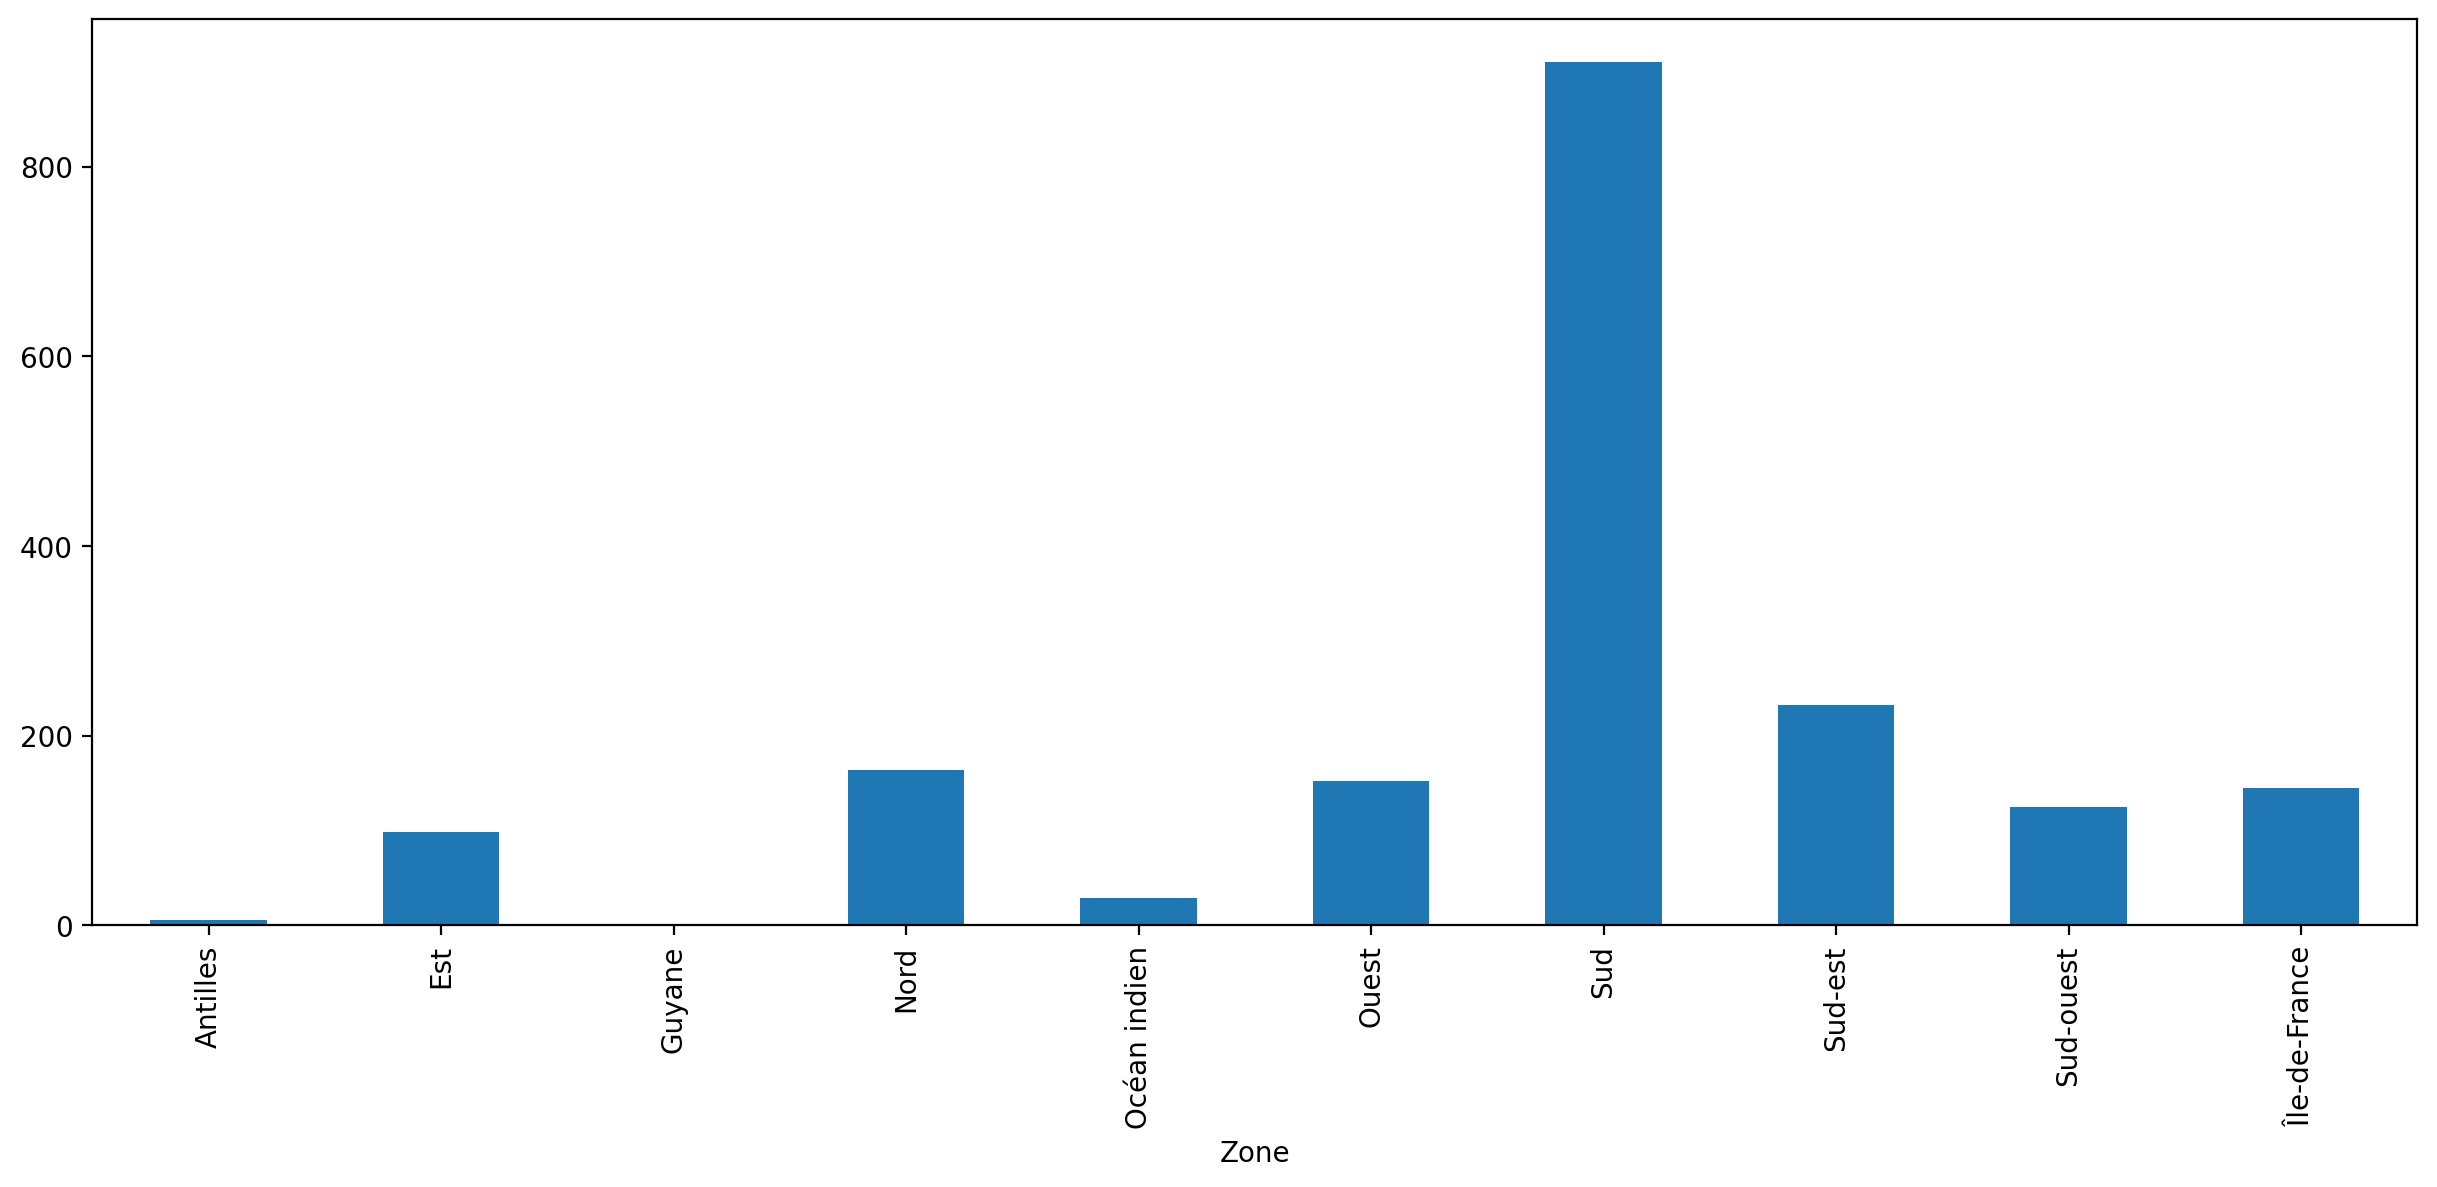

In [16]:
#Affichage graphique sous forme de diagramme du nombre d'éboulement par zone
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points 
interventions.groupby(interventions.Zone).Éboulements.sum().plot.bar()

In [ ]:
# L'Histogramme du nombre des différentes intervention pour toute les régions de la zone nord
interventions_1=interventions.drop(["Annee","Total interventions"],axis=1) # Suppression des colonnes inutile
interventions_1[(interventions_1.Zone=="Nord")].plot.bar(title="nombre d'intervention par type pour chaque region nord",x="Département")

In [17]:
# Renommage de la dernière colonne 
interventions.rename(columns={'Total interventions': 'Total_interventions'}, inplace=True)

In [18]:
#Total des interventions sur chaque zone
interventions.Total_interventions.sum()

4913247

<AxesSubplot:>

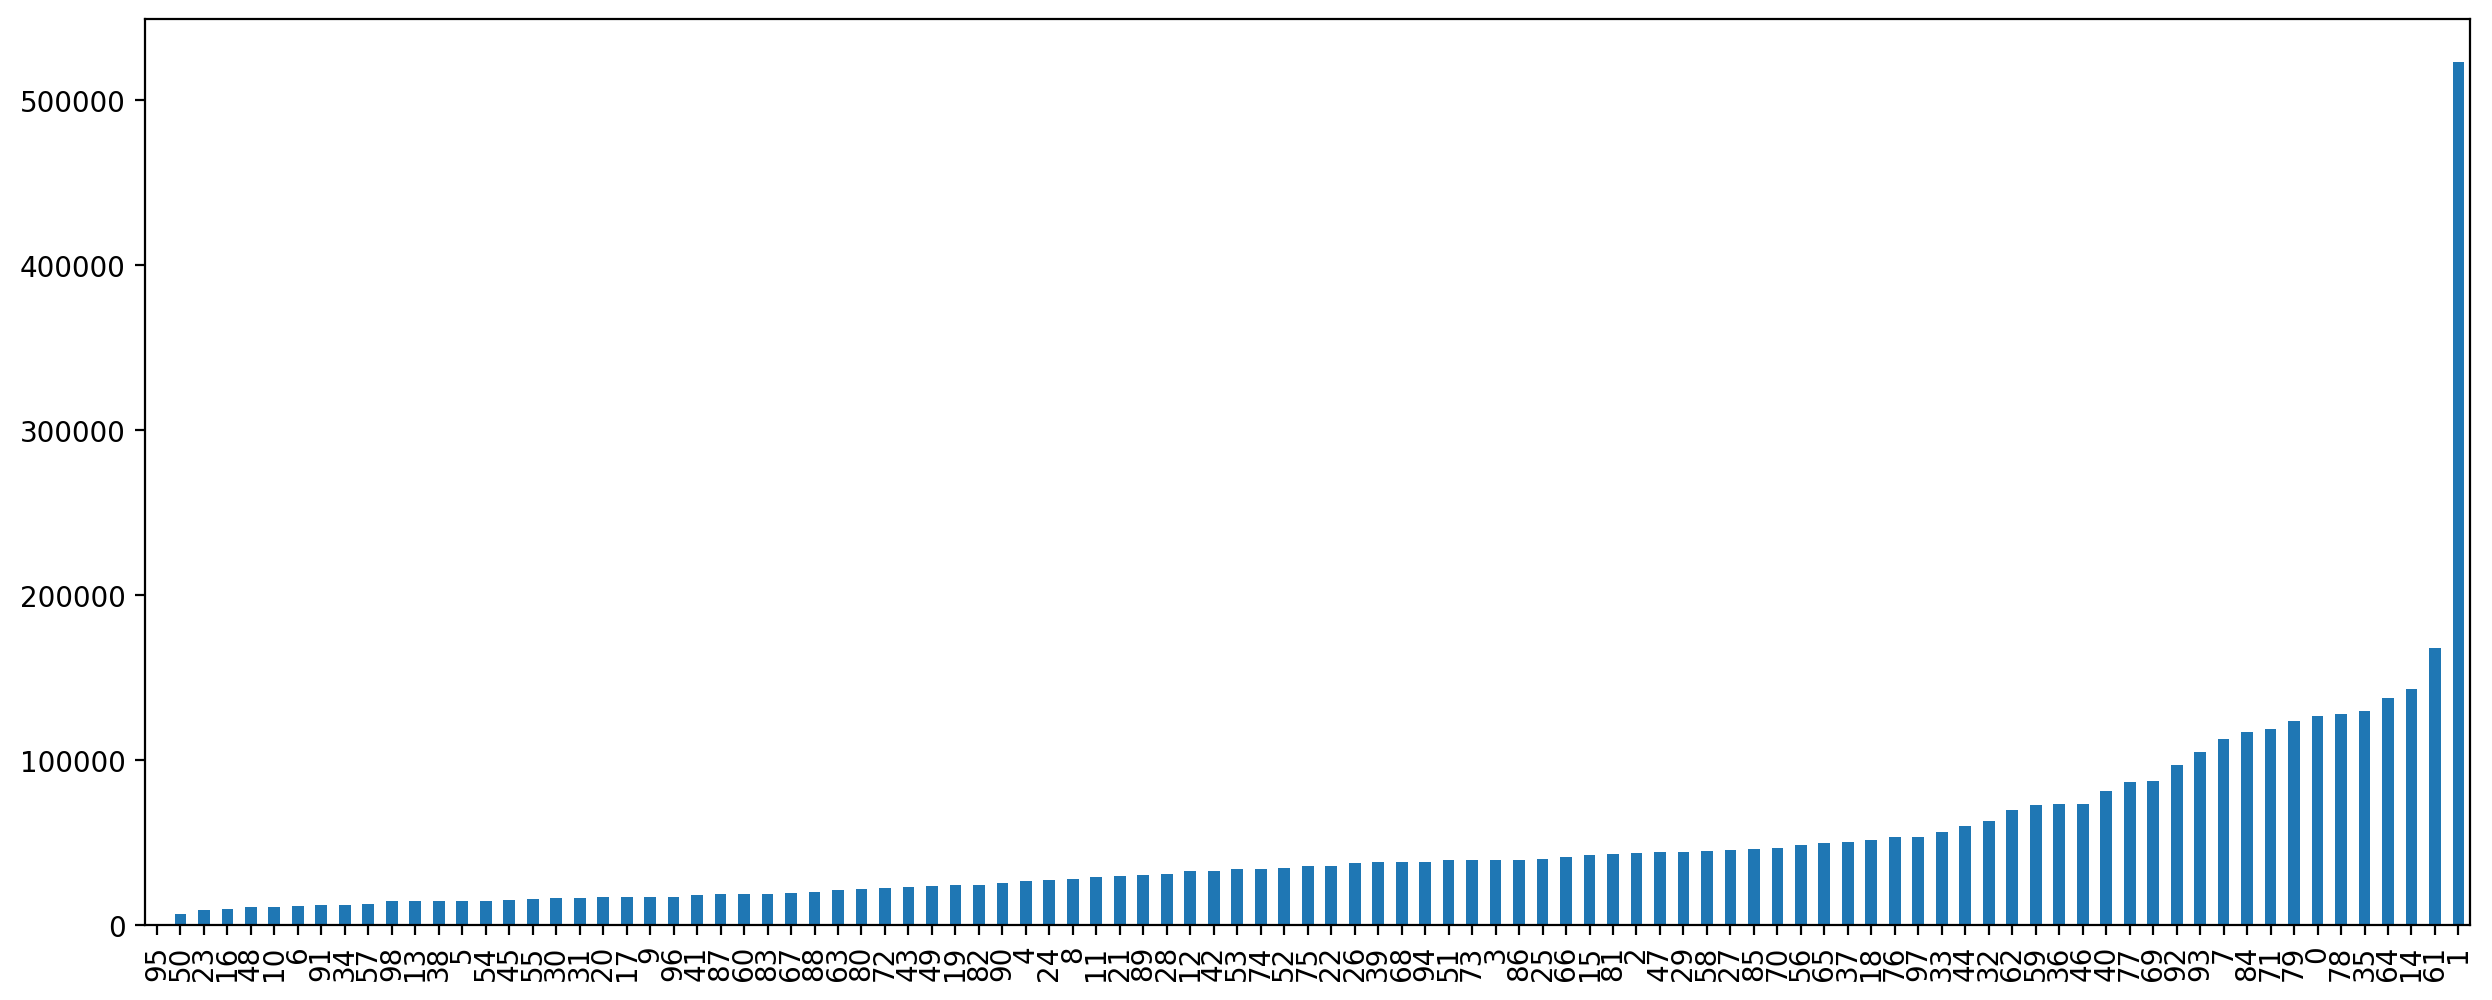

In [19]:
# L'Histogramme du total des intervention pour chaque département. (trié par ordre croissant)
interventions.Total_interventions.sort_values().plot.bar(x="Département")